In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

We will be solving the 1D advection equation using non-interpolating semi-lagrange techniques with a Square initial distribution.



In [2]:
# Parameters
dt = 1
v = 1.23 # advection speed

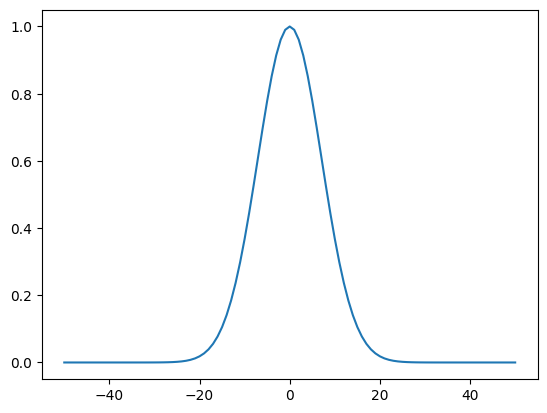

In [3]:
x_coordinates = np.array([x for x in range(-50, 51)])
initial_distribution = np.exp(-((x_coordinates)/10)**2)
first_step_distribution = np.exp(-((x_coordinates - (v*dt))/10)**2)

plt.plot(x_coordinates, initial_distribution)
plt.show()

In [4]:
grid = np.zeros((1000, len(x_coordinates))) # rows are time steps, columns are x coordinates
grid[0, :] = initial_distribution
grid[1, :] = first_step_distribution

In [5]:
# velocity interpolator
def velocity_interp(timestep, shift): # TO DO LATER
    vel_mat = np.zeros((1, len(x_coordinates)))
    vel_mat += v
    return vel_mat

# differentiator 
def shifted_diff(timestep, shift):
    if shift.is_integer():
        diff_mat = (np.roll(grid[timestep, :], int(shift - 1)) - np.roll(grid[timestep, :], int(shift + 1)))/2
    else:
        diff_mat = (np.roll(grid[timestep, :], int(shift - 0.5)) - np.roll(grid[timestep, :], int(shift + 0.5)))
    return diff_mat

# Noninterpolating Semi-Lagrangian, gives us the value of x at the starting point for the next timestep
def semi_lagrange_noninterp(timestep, grid_array, velocity):
    p = int(round(2*velocity))
    shifted_t_1_array = np.roll(grid_array[timestep - 1, :], p)
    grid_array[timestep + 1, :] = shifted_t_1_array + (p/2 - velocity_interp(timestep, p/2))*shifted_diff(timestep, p/2)


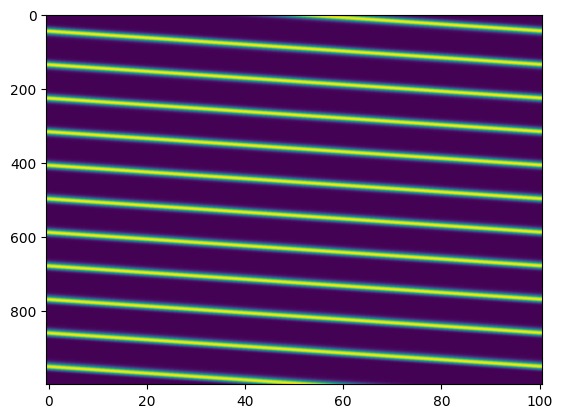

In [6]:
for t in range(1, len(grid) - 1):
    semi_lagrange_noninterp(t, grid, v)
plt.imshow(grid, aspect='auto', cmap='viridis')
plt.show()

In [7]:
from video_creator import create_video
create_video(grid, '1D_gaussian_constvel_advection_noninterp_SL.mp4')